Import library

In [ ]:
from fastai import *
from fastai.vision import *

Path to dataset

In [2]:
path = Path("/notebooks/storage/dataset-resized"); path

PosixPath('/notebooks/storage/dataset-resized')

Create the fastai image data bunch

In [3]:
data = ImageDataBunch.from_folder(path,train='train',valid='valid',test='test',ds_tfms=get_transforms(),bs=64,size=224).normalize(imagenet_stats); data

ImageDataBunch;

Train: LabelList (1766 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glass,glass,glass,glass,glass
Path: /notebooks/storage/dataset-resized;

Valid: LabelList (326 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glass,glass,glass,glass,glass
Path: /notebooks/storage/dataset-resized;

Test: LabelList (435 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /notebooks/storage/dataset-resized

Import the trained resnet 50 model

In [42]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate])

Find and plot the learning rate

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


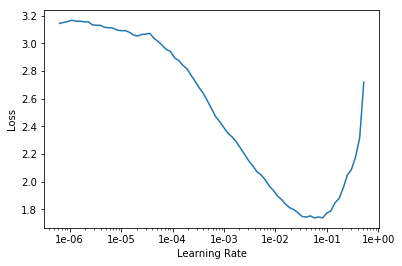

In [22]:
learn.recorder.plot()

Fit the model to the dataset

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.423049,0.563107,0.174847,00:27


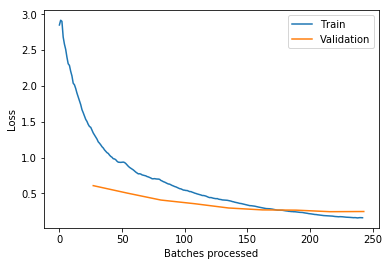

In [26]:
learn.recorder.plot_losses()

Display the errors made on validation set

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()

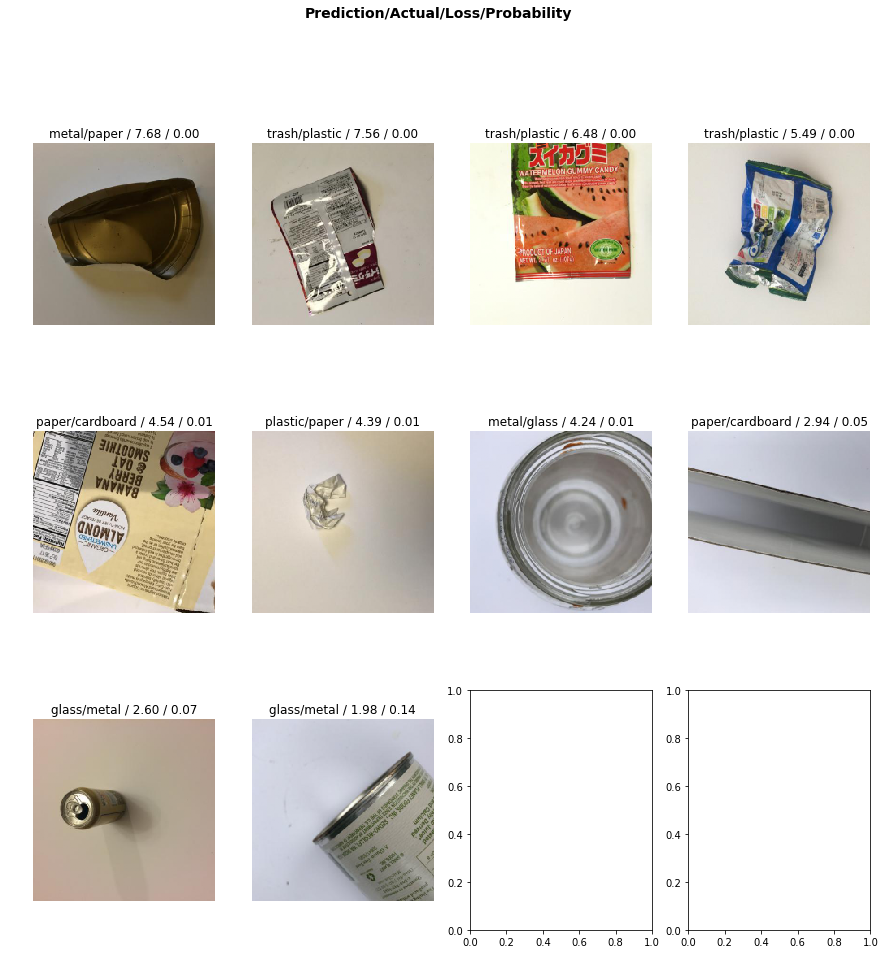

In [28]:
interp.plot_top_losses(10, figsize=(15,15)

Plot the confusion matrix for validation set

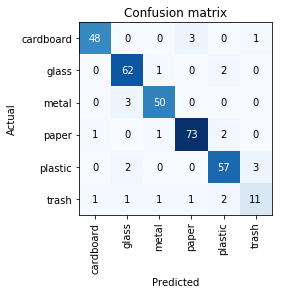

In [29]:
interp.plot_confusion_matrix()

Export model alongwith all transformations, classes, normalization, etc on dataset

In [30]:
learn.export('export-res50')

Save the model weights

In [31]:
learn.save("stage-2-res50",return_path = True)


PosixPath('/notebooks/storage/dataset-resized/models/stage-2-res50.pth')

Get predictions on test set

In [32]:
preds = learn.get_preds(ds_type=DatasetType.Test); preds[0]

tensor([[2.0815e-03, 8.8817e-01, 5.5778e-04, 8.9282e-05, 1.0906e-01, 3.8609e-05],
        [7.0164e-08, 9.9989e-01, 3.2196e-05, 2.8990e-07, 5.0323e-05, 2.4547e-05],
        [3.4693e-07, 9.9788e-01, 6.0711e-05, 4.1881e-04, 1.6286e-03, 6.6548e-06],
        ...,
        [7.8721e-06, 9.8961e-01, 9.4312e-03, 3.5378e-06, 8.4208e-04, 1.0563e-04],
        [3.7288e-03, 7.5143e-03, 9.8251e-01, 2.4748e-05, 5.9701e-03, 2.5192e-04],
        [7.2446e-06, 2.7236e-04, 9.9764e-01, 1.2266e-05, 4.7551e-04, 1.5937e-03]])

In [69]:
max(preds[0][0]).item()
#reds[0][0]

0.9901500940322876

In [33]:
output_list = []
for i in range (len(preds[0])):
    indx = np.argmax(preds[0][i]).item()
    prediction = str(preds[0][i][indx].item())
    output_list.append({data.classes[indx]:prediction})
print(len(output_list))


435


Lets pick a random test image and see how well we have done.

{'plastic': '0.9998238682746887'}


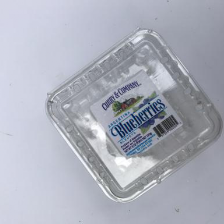

In [34]:
print(output_list[328])
learn.data.test_ds[328][0]


Overload the image data bunch and supply test set along with labels as the valid set to get confusion matrix and all

In [35]:
data_test = ImageDataBunch.from_folder(path, train='train', valid='test', bs=64, size=224, ds_tfms = get_transforms()).normalize(imagenet_stats)

In [36]:
learn_test = cnn_learner(data_test, models.resnet50, metrics=[error_rate])

In [37]:
learn_test.load('stage-2-res50')

Learner(data=ImageDataBunch;

Train: LabelList (1766 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glass,glass,glass,glass,glass
Path: /notebooks/storage/dataset-resized;

Valid: LabelList (435 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glass,glass,glass,glass,glass
Path: /notebooks/storage/dataset-resized;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, moment

In [38]:
interp_test = ClassificationInterpretation.from_learner(learn_test)


In [39]:
losses,idxs = interp_test.top_losses()


Add the diagonal (going left to right downwards) numbers and divide by 435 to get accuracy = 88.505%

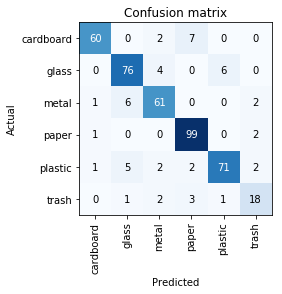

In [41]:
interp_test.plot_confusion_matrix()

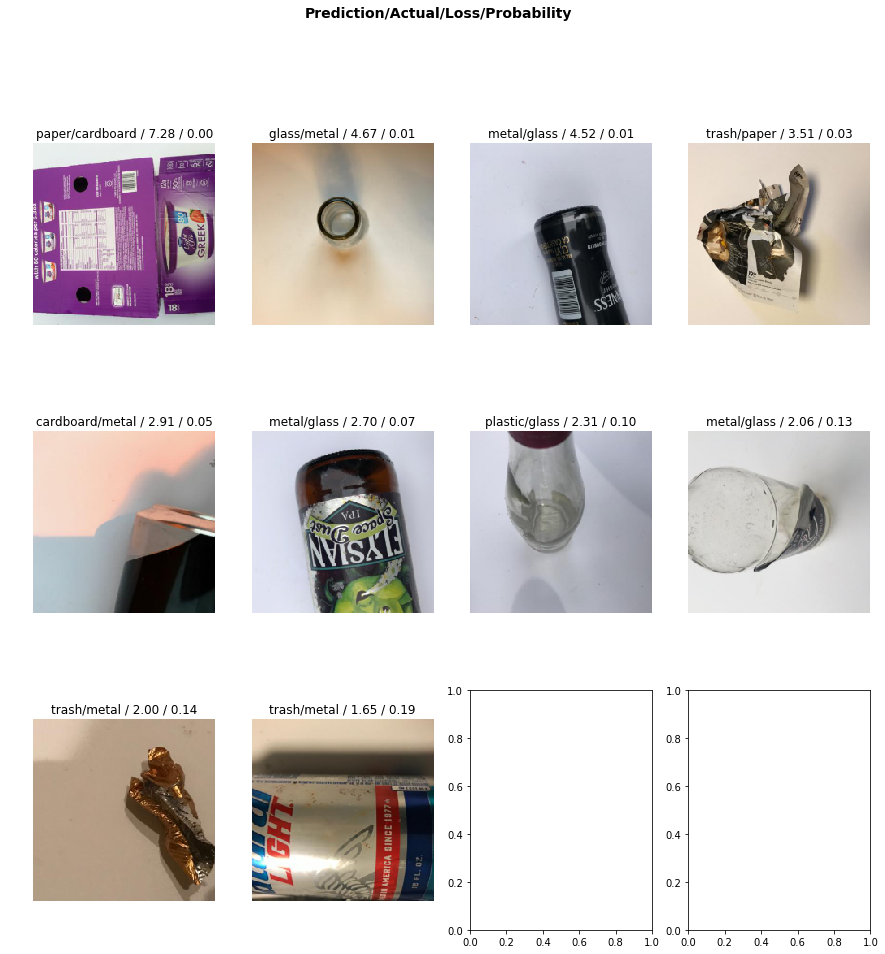

In [10]:
interp.plot_top_losses(10,figsize=(15,15))